In [2]:
!pip install scikit-learn

In [71]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

In [72]:
import sklearn as sl

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [74]:
#load data set
digit = pd.read_csv("train.csv")
digit.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# number of rows in data set
number_of_rows = len(digit)
number_of_rows

42000

In [77]:
#data set with only pixels
digit_pixels = train.drop(['label'], axis=1)
digit_pixels.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# Turn data set into array
digit_pixels_array = train_pixels.values
digit_pixels_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [79]:
# Digit labels
digit_label = train['label']
digit_label.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

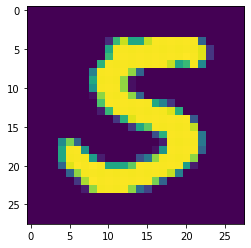

In [80]:
#show the 100th image of data set
one_hundredth_row = digit_pixels_array[99]
one_hundredth_matrix = one_hundredth_row.reshape((28, 28))
one_hundredth_image = plt.imshow(one_hundredth_matrix)

In [82]:
# See if the 100th label matches the image
one_hundredth_label = digit_label.iloc[99]
one_hundredth_label

5

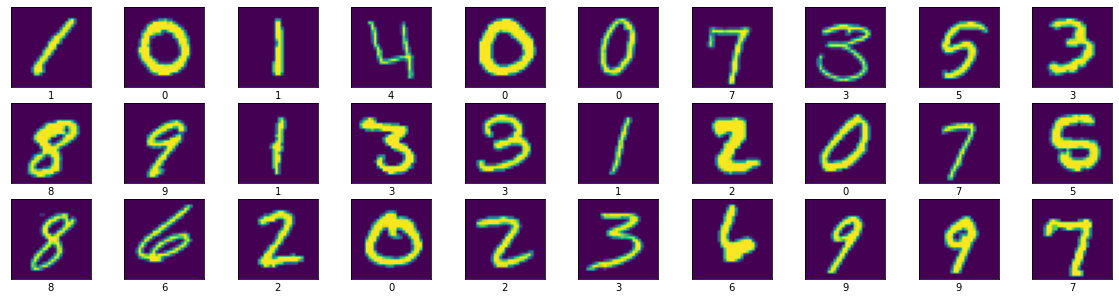

In [83]:
# Display the first 30 digits in data set
plt.figure(figsize=(20, 5))
for i in range(30):
    plt.subplot(3,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(digit_pixels_array[i].reshape(28, 28))
    plt.xlabel(digit_label[i])   


In [31]:
# Use cross validation and tune to find the best K

In [87]:
# split the dataset into training set and testing set


digit_train, digit_test = train_test_split(
    train, train_size=0.75, stratify=train["label"],
)

digit_train.info()
digit_test.info()
digit_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31500 entries, 3623 to 11529
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 188.9 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10500 entries, 25615 to 26097
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 63.0 MB


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
3623,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40333,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18368,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30196,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2886,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
# Find the percentage of each digit in digit_train
digit_proportions = pd.DataFrame()
digit_proportions['Count'] = digit_train.groupby(['label'])['label'].count()
digit_proportions['percent'] = 100 * digit_proportions['Count'] / len(digit_train)
digit_proportions

,Count,percent
label,,
0,3099,9.838095
1,3513,11.152381
2,3133,9.946032
3,3263,10.358730
4,3054,9.695238
5,2846,9.034921
6,3103,9.850794
7,3301,10.479365
8,3047,9.673016


In [35]:
# Since the scale of each pixel is consistent (0-255), we do not need to standardize the data

In [98]:
# cross validation
# Test_score is the validation scores
np.random.seed(1)
from sklearn.model_selection import cross_validate

# Randomly split digit_train into a subtrain (75%) and a validation set (25%)
digit_subtrain, digit_validation = train_test_split(
     digit_train, test_size = 0.25, random_state=1
)

X = digit_subtrain.drop(['label'], axis=1)
y = digit_subtrain["label"]

# Use 5 folds for cross validation
cv_5 = cross_validate(
    estimator = knn_spec,
    X=X,
    y=y,
    cv=5,
    return_train_score=True,
)

# Display the matrics for cross validation
cv_5_df = pd.DataFrame(cv_5)
cv_5


[CV 3/5] END ....................n_neighbors=10;, score=0.958 total time= 1.2min
[CV 4/5] END ....................n_neighbors=30;, score=0.936 total time= 1.1min
[CV 3/5] END ....................n_neighbors=70;, score=0.928 total time=  37.4s
[CV 2/5] END ....................n_neighbors=10;, score=0.956 total time= 1.4min
[CV 1/5] END ....................n_neighbors=50;, score=0.933 total time= 1.4min
[CV 4/5] END ....................n_neighbors=70;, score=0.921 total time=  16.5s
[CV 3/5] END ....................n_neighbors=30;, score=0.942 total time= 1.4min
[CV 3/5] END ....................n_neighbors=50;, score=0.935 total time= 1.4min
[CV 5/5] END ....................n_neighbors=70;, score=0.923 total time=  16.5s
[CV 4/5] END ....................n_neighbors=10;, score=0.950 total time= 1.4min
[CV 1/5] END ....................n_neighbors=70;, score=0.927 total time= 1.4min
[CV 5/5] END ....................n_neighbors=10;, score=0.956 total time= 1.4min
[CV 2/5] END ...............

{'fit_time': array([0.15959191, 0.10357904, 0.07017803, 0.18559504, 0.04053402]),
 'score_time': array([6.67031312, 5.05145788, 5.48824716, 5.91978788, 5.00059319]),
 'test_score': array([0.95915344, 0.95661376, 0.95957672, 0.95365079, 0.95746032]),
 'train_score': array([0.96825397, 0.9694709 , 0.96883598, 0.97042328, 0.96904762])}

In [99]:
# Find the mean and standard error
cv_5_metrics = cv_5_df.aggregate(func=['mean','std'])
cv_5_metrics

,fit_time,score_time,test_score,train_score
mean,0.111896,5.626080,0.957291,0.969206
std,0.060433,0.692299,0.002368,0.000809


In [100]:
from sklearn.model_selection import GridSearchCV


# Try 10, 30, 50, 70 neighbors
param_grid = {
     'n_neighbors': [10, 30, 50, 70],
}

# Create a tune model

digit_tune_grid = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    verbose = 3, 
    n_jobs = -1)


In [101]:
# Fit the model to the training data

digit_model_grid = digit_tune_grid.fit(X, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [102]:
accuracies_grid = pd.DataFrame(digit_model_grid.cv_results_)
accuracies_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.796806,0.027136,92.641976,1.895147,10,{'n_neighbors': 10},0.956402,0.955979,0.958307,0.950265,0.956402,0.955471,0.002725,1
1,2.023578,1.536312,89.515935,3.715444,30,{'n_neighbors': 30},0.942646,0.939894,0.942434,0.936296,0.939683,0.940190,0.002305,2
2,1.354467,0.005274,82.906580,3.159796,50,{'n_neighbors': 50},0.933122,0.932275,0.934603,0.929101,0.929312,0.931683,0.002156,3
3,1.837494,1.512225,34.674249,20.475615,70,{'n_neighbors': 70},0.926772,0.925714,0.927619,0.921270,0.922751,0.924825,0.002422,4


In [106]:
# Mean_test_score deceases as the number of neighbors increases, so choose smaller K's
np.random.seed(1)

param_grid2 = {
     'n_neighbors': [6, 7, 8, 9],
}

digit_tune_grid2 = GridSearchCV(
    KNeighborsClassifier(),
    param_grid2,
    cv=5,
    n_jobs = -1)

In [107]:
digit_model_grid2 = digit_tune_grid2.fit(X, y)

In [108]:
accuracies_grid2 = pd.DataFrame(digit_model_grid2.cv_results_)
accuracies_grid2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.317588,0.017650,89.703179,0.705923,6,{'n_neighbors': 6},0.960635,0.956402,0.957460,0.953862,0.958942,0.957460,0.002295,1
1,1.201220,1.112522,85.503514,5.240130,7,{'n_neighbors': 7},0.959153,0.956614,0.959577,0.953651,0.957460,0.957291,0.002118,2
2,2.083084,0.032216,78.029071,1.203539,8,{'n_neighbors': 8},0.957249,0.954921,0.958519,0.952381,0.957249,0.956063,0.002177,3
3,2.535509,0.732866,32.158179,23.481919,9,{'n_neighbors': 9},0.956190,0.956190,0.957884,0.951111,0.954921,0.955259,0.002278,4


In [109]:
accuracy_vs_k = (
    alt.Chart(accuracies_grid2)
    .mark_line(point=True)
    .encode(
        x=alt.X(
            "param_n_neighbors",
            title="Neighbors",
        ),
        y=alt.Y(
            "mean_test_score",
            title="Accuracy estimate",
            scale=alt.Scale(domain=(0.95, 0.96)),
        ),
    )
)

accuracy_vs_k

alt.Chart(...)

In [110]:
# The best value for k is 6
# Model specification for K-nearest neighbors classification

knn_spec = KNeighborsClassifier(n_neighbors=6)

In [112]:
# Show only the pixels of training set
digit_train_pixels = digit_train.drop(['label'], axis=1)
digit_train_pixels.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
3623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40333,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
# Show only the labels of training set
digit_train_label = digit_train['label']
digit_train_label.head()

3623     2
40333    2
18368    8
30196    5
2886     8
Name: label, dtype: int64

In [114]:
# Train the model on subtrain
knn_spec.fit(X=digit_train_pixels, y=digit_train_label);

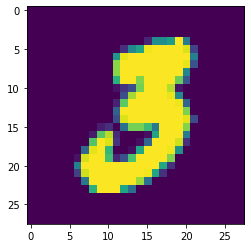

In [117]:
# Display the image of first digit in testing set
digit_test_pixels = digit_test.drop(['label'], axis=1)
first_test_row = digit_test_pixels.iloc[0].values
first_test_matrix = first_test_row.reshape((28, 28))
first_test_image = plt.imshow(first_test_matrix)

In [119]:
# Predict the first digit in test set
new_obs = digit_test_pixels.head(1)
prediction = knn_spec.predict(new_obs)
prediction[0]

3

In [122]:
# Label of first digit in testing set
digit_test.head(1)['label']

25615    3
Name: label, dtype: int64

[CV 3/5] END ....................n_neighbors=30;, score=0.942 total time= 1.6min
[CV 1/5] END ....................n_neighbors=50;, score=0.933 total time= 1.3min
[CV 3/5] END ....................n_neighbors=70;, score=0.928 total time=  27.2s
[CV 3/5] END ....................n_neighbors=10;, score=0.958 total time= 1.6min
[CV 3/5] END ....................n_neighbors=50;, score=0.935 total time= 1.4min
[CV 2/5] END ....................n_neighbors=30;, score=0.940 total time= 1.6min
[CV 5/5] END ....................n_neighbors=50;, score=0.929 total time= 1.4min
[CV 4/5] END ....................n_neighbors=10;, score=0.950 total time= 1.6min
[CV 1/5] END ....................n_neighbors=70;, score=0.927 total time= 1.3min
[CV 2/5] END ....................n_neighbors=70;, score=0.926 total time=  29.7s
[CV 5/5] END ....................n_neighbors=10;, score=0.956 total time= 1.6min
[CV 4/5] END ....................n_neighbors=50;, score=0.929 total time= 1.4min
[CV 4/5] END ...............

In [124]:
# Prediction for testing set
test_predictions = knn_spec.predict(digit_test.drop(['label'], axis=1))

# Add the predictions to testing set
test_predictions = pd.concat(
    [
        pd.DataFrame(test_predictions, columns=["predicted"]),
        digit_test.reset_index(drop=True),
    ],
    axis=1,
)                         

In [128]:
test_predictions.head(10)  

,predicted,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,8,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,8,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
